<a href="https://colab.research.google.com/github/sarychief/projects/blob/main/PyTorch_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random

# Прописываем сиды, чтобы в дальнейшем воспроизводить рандомную выборку
random.seed(0)
np.random.seed(0)
torch.cuda.manual_seed(0)
torch.manual_seed(0)

In [2]:
from sklearn.datasets import load_wine

dataset = load_wine()

In [3]:
dataset.data.shape
# 3 класса, 13 атрибутов

(178, 13)

In [4]:
from sklearn.model_selection import train_test_split
# Поделим выборку

X_train, X_test, y_train, y_test = train_test_split(dataset.data[:, :2],  # берем только две первые колонки
                                                    dataset.target,       # номера классов предсказаний
                                                    test_size = 0.3,      # процент тестовой выборки
                                                    shuffle=True)         # Перемешиваниям во избежания коррелятов последовательностей

In [5]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.IntTensor(y_train)
y_test = torch.IntTensor(y_test)

In [18]:
class WineNet(nn.Module):

  def __init__(self, n):
    super(WineNet, self).__init__()

    self.fc1 = nn.Linear(2, n)    
    self.act1 = nn.Sigmoid()      

    self.fc2 = nn.Linear(n,n)     
    self.act2 = nn.Sigmoid()

    self.fc3 = nn.Linear(n, 3)    

    self.sm = nn.Softmax(dim=1)   


  def __forward__(self, x):
    
    x = self.fc1(x)
    x = self.act1(x)

    x = self.fc2(x)
    x = self.act2(x)

    x = self.act3(x)
    # softmax мы не включаем потому что нам нужны лоссы, а в этом случае логарифм из кросс-энтропийной потери и экспонента из софтмакса взаимно сократятся
    # если бы нам нужны были вероятности, то sm мы бы включили

  def inference(self, x): # отедельно инициализируем функцию вычисления вероятности многоклассовой
    x = self.forward(x)
    x = self.sm(x)
    return x

In [29]:
class WineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(WineNet, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.activ1 = torch.nn.Sigmoid()
        #self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        #self.activ2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
        #x = self.fc2(x)
        #x = self.activ2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x

In [30]:
wineNet = WineNet(10)

In [31]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(wineNet.parameters(), 
                             lr=1.0e-3)

До этого было как:
1. Брали весь датасет 
2. Считали по нему лосс-функцию
3. Делали градиентный шаг
4. Повторяем многократно 

Но сейчас мы будем производить обучение по частям - с помощью бачей
1. Берем бач из 10 наблюдений
2. Считаем по нему потерю
3. По нему считаем градиентный шаг
4. Производим градиентный шаг
5. Берем новые наблюдения и заново

In [26]:
np.random.permutation(20)
# эта функция позволяет исоздать n значений от 0 до n 
# это нужно для того, чтобы при каждой эпохе выделять разные бачи для обучения модели  

array([18, 11,  8, 15,  0, 19, 13,  7, 10, 16, 17,  9,  6, 12,  5,  4,  2,
        3, 14,  1])

In [32]:
batch_size = 20

for epoch in range(10000):

    order = np.random.permutation(len(X_train))

    for start_index in range(0, len(X_train), batch_size):

        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = wineNet.forward(x_batch) 
        
        loss_value = loss(preds, y_batch.type(torch.LongTensor))
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_preds = wineNet.forward(X_test)
        test_preds = test_preds.argmax(dim=1)
        print((test_preds == y_test).float().mean())


tensor(0.2407)
tensor(0.4630)
tensor(0.7407)
tensor(0.7037)
tensor(0.7407)
tensor(0.7407)
tensor(0.7407)
tensor(0.7963)
tensor(0.7593)
tensor(0.7593)
tensor(0.7593)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.8148)
tensor(0.7778)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.7963)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.7963)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.7963)
tensor(0.8148)
tensor(0.8519)
tensor(0.8333)
tensor(0.8519)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8148)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8333)
tensor(0.8704)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8

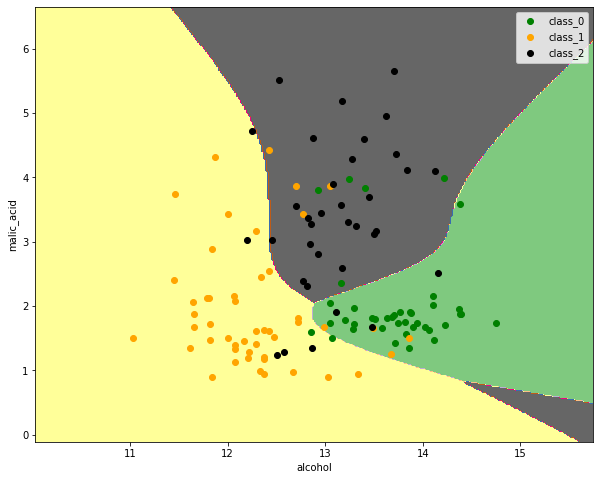

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wineNet.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=dataset.target_names[i],
                cmap='Accent')
    plt.xlabel(dataset.feature_names[0])
    plt.ylabel(dataset.feature_names[1])
    plt.legend()